   area  rooms   price
0  2104      3  399900
1  1600      3  329900
2  2400      3  369000
3  1416      2  232000
4  3000      4  539900
   area  rooms
0  2104      3
1  1600      3
2  2400      3
3  1416      2
4  3000      4
    price
0  399900
1  329900
2  369000
3  232000
4  539900
Train
Predict
[316884.52787937 480370.86132641]
Deploy


C:\Users\Chalermwong\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ModuleNotFoundError: No module named 'google.colab'

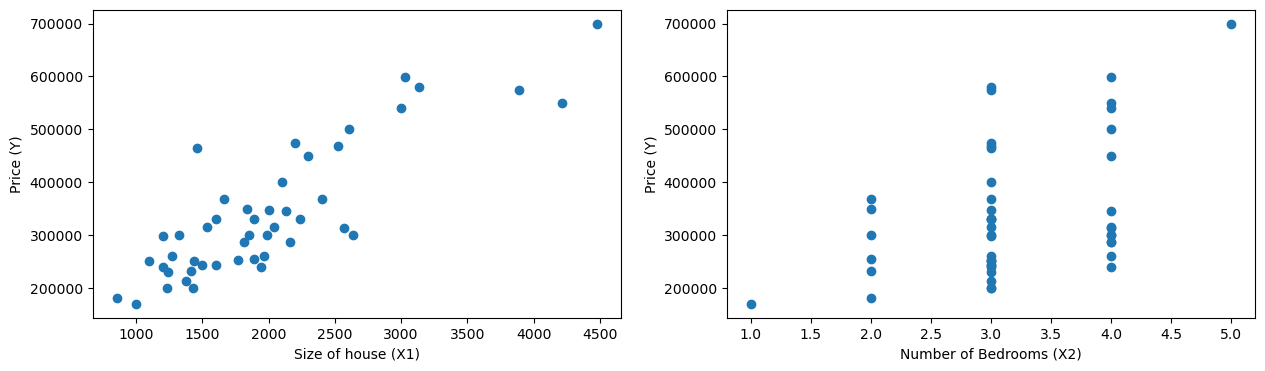

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)

data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt')
print(data.head())
#X = data[["area","rooms"]]
X = data.iloc[:,0:2]
print(X.head())

#y = data.price
#y = data.iloc[:,2]
y = data[["price"]] 
print(y.head())

plt.figure(figsize = (15,4), dpi=100)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X.iloc[:,1],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")

"""Train model"""
print("Train")
lin_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
lin_reg.fit(X, y)


"""Predict"""
print("Predict")
#X_test = np.array([[2000,6]])
X_test = pd.DataFrame(
    {
    "area":[2000,3000],
    "rooms":[6,3]
    }
)
result = lin_reg.predict(X_test)
print(result)

"""Deploy"""
print("Deploy")
pickle.dump(lin_reg, open('model.sav','wb') )
from google.colab import files
files.download('model.sav')

In [ ]:
n_samples = 1000
n_features = 10000

import timeit
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)

rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)


mysetup = """
import timeit
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)
n_samples = 1000
n_features = 10000
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

"""

mycode1 = """
lin_reg2 = LinearRegression()
lin_reg2.fit(X,y)
"""

mycode2 = """
reg2 = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg2.fit(X, y)
"""

print("Time(Linear):",timeit.timeit(setup=mysetup,stmt=mycode1,number=1000))
print("Time(SGD):",timeit.timeit(setup=mysetup,stmt=mycode2,number=1000))
